In [27]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import scipy.io as sio
import math 

In [28]:

##In case you were wondering how I prepared the data
"""
#load data

#data source: https://finance.yahoo.com/quote/%5EGSPC/history/

weeks_after_start = []
dewtemp = []

f = open('localweather.csv')
header = f.readline()
idx = header.split(',').index('HourlyDewPointTemperatureC')
startdate = None
line = f.readline()

while len(line) > 0:
    splitline = line.split(',')
    
    #load day
    dt = splitline[5].split(' ')
    d = dt[0].split('-')
    t = dt[1].split(':')
    
    d = int(d[0]),int(d[1]),int(d[2])    
    t = int(t[0]), int(t[1])
    d = datetime.datetime(year=d[0],month=d[1],day=d[2], hour=t[0],minute=d[1])
    if startdate is None:
        startdate = copy.deepcopy(d)
    
    if  len(splitline[idx].strip('')) == 0: 
        line = f.readline()
        continue
    weeks_after_start.append((d - startdate).seconds/( 24 * 60 * 60*7 +0.) + (d-startdate).days/7.)
    
    dewtemp.append(float(splitline[idx]))

    line = f.readline()

weeks_after_start, dewtemp = np.array(weeks_after_start), np.array(dewtemp)
plt.plot(weeks_after_start, dewtemp)

plt.xlabel('Weeks after first reading')
plt.ylabel('Dew point temp (C)')
plt.tight_layout()
plt.savefig('polyfit_hw1_0.png')
plt.savefig('polyfit_hw1_0.eps')
N = len(weeks_after_start)

sio.savemat('weatherDewTmp.mat',{'weeks':weeks_after_start,'dew':dewtemp})
print N
"""



"\n#load data\n\n#data source: https://finance.yahoo.com/quote/%5EGSPC/history/\n\nweeks_after_start = []\ndewtemp = []\n\nf = open('localweather.csv')\nheader = f.readline()\nidx = header.split(',').index('HourlyDewPointTemperatureC')\nstartdate = None\nline = f.readline()\n\nwhile len(line) > 0:\n    splitline = line.split(',')\n    \n    #load day\n    dt = splitline[5].split(' ')\n    d = dt[0].split('-')\n    t = dt[1].split(':')\n    \n    d = int(d[0]),int(d[1]),int(d[2])    \n    t = int(t[0]), int(t[1])\n    d = datetime.datetime(year=d[0],month=d[1],day=d[2], hour=t[0],minute=d[1])\n    if startdate is None:\n        startdate = copy.deepcopy(d)\n    \n    if  len(splitline[idx].strip('')) == 0: \n        line = f.readline()\n        continue\n    weeks_after_start.append((d - startdate).seconds/( 24 * 60 * 60*7 +0.) + (d-startdate).days/7.)\n    \n    dewtemp.append(float(splitline[idx]))\n\n    line = f.readline()\n\nweeks_after_start, dewtemp = np.array(weeks_after_start),

742


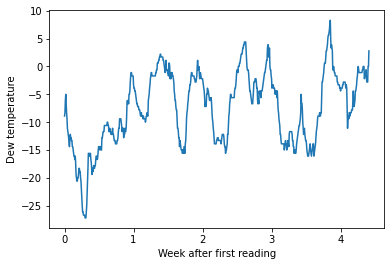

In [29]:
#This cell forms the mat file you were already given
data = sio.loadmat('weatherDewTmp.mat')
weeks_after_start = data['weeks'][0]
dewtemp = data['dew'][0]
N = len(dewtemp)
plt.plot(weeks_after_start, dewtemp)
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
print(N)

In [30]:
def packX(z,poly_order):
    X = np.zeros((len(z),poly_order+1))
    for i in z:
        for j in range(poly_order + 1):
            X[i][j] = math.pow(i, j)
    
    return X

def packXReal(poly_order):
    X = np.zeros((len(weeks_after_start),poly_order+1))
    for i in range(len(weeks_after_start)):
        value = weeks_after_start[i]
        for j in range(poly_order + 1):
            X[i][j] = math.pow(value, j)

    return X

def solveLinearSystem(X,y):
    return np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))
   

# TEST SCRIPT. DO NOT MODIFY!
X = packX(range(100),3)
y = np.sqrt(np.array(range(100)))
theta = solveLinearSystem(X,y)
print('Check number: ', np.sum(theta))


Check number:  1.3412701796105337


Check number p=1:  -10.057554762382326


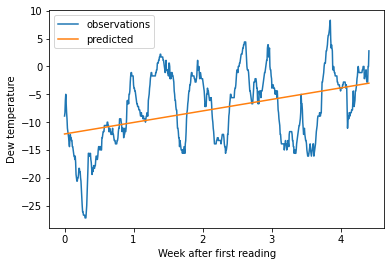

In [31]:
### p = 1 test
p_1 = packXReal(1)
theta = solveLinearSystem(p_1, dewtemp)
print('Check number p=1: ', np.sum(theta))

plt.plot(weeks_after_start, dewtemp, label="observations")
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
x = np.linspace(0, 4.41, 1000)
plt.plot(x, theta[0] + theta[1]*x, linestyle='-', label="predicted");
plt.legend(loc="upper left")

Check number p=2:  -9.85703238694051


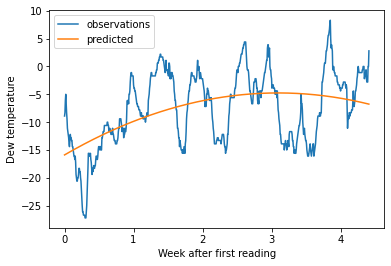

In [32]:
### p = 2 test
p_2 = packXReal(2)
theta = solveLinearSystem(p_2, dewtemp)
print('Check number p=2: ', np.sum(theta))

plt.plot(weeks_after_start, dewtemp, label="observations")
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
x = np.linspace(0, 4.41, 1000)
plt.plot(x, theta[0] + theta[1]*x + theta[2]*(x**2), linestyle='-', label="predicted");
plt.legend(loc="upper left")

Check number p=3:  -7.499433338958726


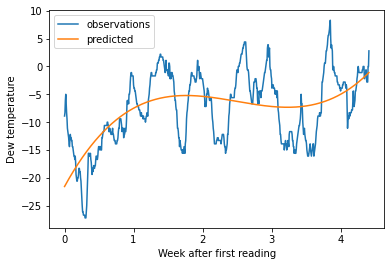

In [33]:
### p = 3 test
p_3 = packXReal(3)
theta = solveLinearSystem(p_3, dewtemp)
print('Check number p=3: ', np.sum(theta))

plt.plot(weeks_after_start, dewtemp, label="observations")
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
x = np.linspace(0, 4.41, 1000)
plt.plot(x, theta[0] + theta[1]*x + theta[2]*(x**2) + theta[3]*(x**3), linestyle='-', label="predicted");
plt.legend(loc="upper left")

Check number p=10:  -6.553632481258534


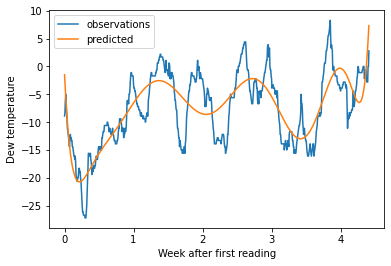

In [34]:
### p = 10 test
p_10 = packXReal(10)
theta = solveLinearSystem(p_10, dewtemp)
print('Check number p=10: ', np.sum(theta))

plt.plot(weeks_after_start, dewtemp, label="observations")
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
x = np.linspace(0, 4.41, 1000)
plt.plot(x, theta[0] + theta[1]*x + theta[2]*(x**2) + theta[3]*(x**3) + theta[4]*(x**4)+ theta[5]*(x**5)  + theta[6]*(x**6) + theta[7]*(x**7) + theta[8]*(x**8)+theta[9]*(x**9) + + theta[10]*(x**10), linestyle='-', label="predicted")
plt.legend(loc="upper left")

Check number p=100:  -7.184223641379049


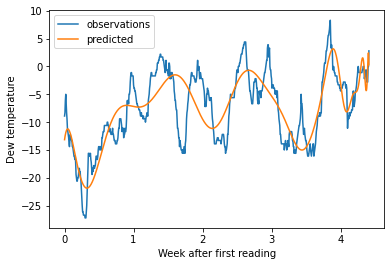

In [35]:
### p = 100 test
p_100 = packXReal(100)
theta = solveLinearSystem(p_100, dewtemp)
print('Check number p=100: ', np.sum(theta))

plt.plot(weeks_after_start, dewtemp, label="observations")
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
x = np.linspace(0, 4.41, 1000)
y = np.zeros(1000)

for i in range(len(x)):
    val = 0
    for j in range(100 + 1):
        v = theta[j] * ((x[i])**j)
        val += v
    y[i] = val

plt.plot(x, y, label="predicted")
plt.legend(loc="upper left")

In [36]:
def solveRidgeRegressionSystem(X,y,rho):
    transpose = np.transpose(X)
    part1 = np.dot(transpose, X)
    
    identity = np.identity(len(part1))
    identity = (rho) * identity
    
    part1 = np.add(part1, identity)
    part1 = np.linalg.inv(part1)
    
    part2 = np.dot(transpose, y)
    
    return np.dot(part1, part2)

# TEST SCRIPT. DO NOT MODIFY!
X = packX(range(100),3)
y = np.sqrt(np.array(range(100)))
theta = solveRidgeRegressionSystem(X,y,1)
print('Check number: ', np.sum(theta))

Check number:  1.2061712965224085


Check number p=1:  -10.012690633134602


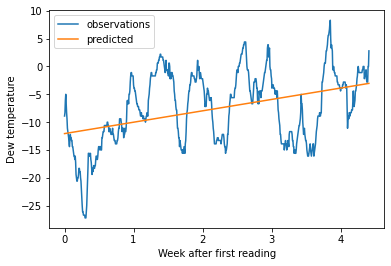

In [37]:
### p = 1 test
p_1 = packXReal(1)
theta = solveRidgeRegressionSystem(p_1, dewtemp, 1)
print('Check number p=1: ', np.sum(theta))

plt.plot(weeks_after_start, dewtemp, label="observations")
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
x = np.linspace(0, 4.41, 1000)
plt.plot(x, theta[0] + theta[1]*x, linestyle='-', label="predicted");
plt.legend(loc="upper left")

Check number p=2:  -9.803693118407132


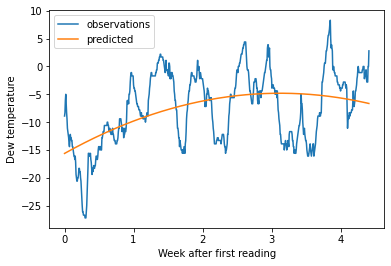

In [38]:
### p = 2 test
p_2 = packXReal(2)
theta = solveRidgeRegressionSystem(p_2, dewtemp, 1)
print('Check number p=2: ', np.sum(theta))

plt.plot(weeks_after_start, dewtemp, label="observations")
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
x = np.linspace(0, 4.41, 1000)
plt.plot(x, theta[0] + theta[1]*x + theta[2]*(x**2), linestyle='-', label="predicted");
plt.legend(loc="upper left")

Check number p=3:  -7.765684387043798


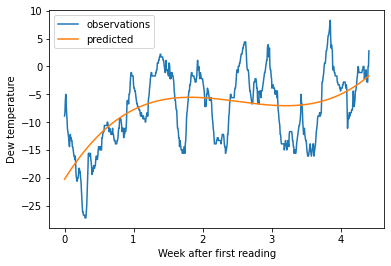

In [39]:
### p = 3 test
p_3 = packXReal(3)
theta = solveRidgeRegressionSystem(p_3, dewtemp,1)
print('Check number p=3: ', np.sum(theta))

plt.plot(weeks_after_start, dewtemp, label="observations")
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
x = np.linspace(0, 4.41, 1000)
plt.plot(x, theta[0] + theta[1]*x + theta[2]*(x**2) + theta[3]*(x**3), linestyle='-', label="predicted");
plt.legend(loc="upper left")

Check number p=10:  -7.493160024160716


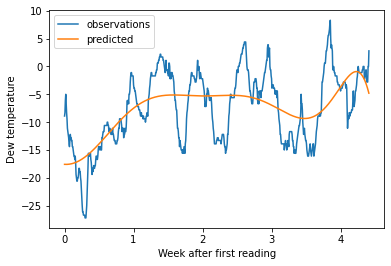

In [40]:
### p = 10 test
p_10 = packXReal(10)
theta = solveRidgeRegressionSystem(p_10, dewtemp,1)
print('Check number p=10: ', np.sum(theta))

plt.plot(weeks_after_start, dewtemp, label="observations")
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
x = np.linspace(0, 4.41, 1000)
plt.plot(x, theta[0] + theta[1]*x + theta[2]*(x**2) + theta[3]*(x**3) + theta[4]*(x**4)+ theta[5]*(x**5)  + theta[6]*(x**6) + theta[7]*(x**7) + theta[8]*(x**8)+theta[9]*(x**9) + + theta[10]*(x**10), linestyle='-', label="predicted")
plt.legend(loc="upper left")

Check number p=100:  -7.369289881211444


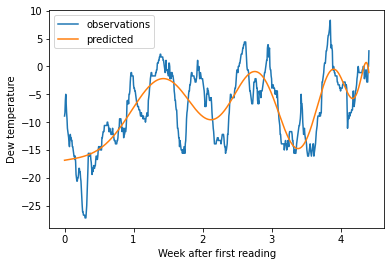

In [45]:
### p = 100 test
p_100 = packXReal(15)
l = 15
theta = solveRidgeRegressionSystem(p_100, dewtemp,4)
print('Check number p=100: ', np.sum(theta))

plt.plot(weeks_after_start, dewtemp, label="observations")
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
x = np.linspace(0, 4.41, 1000)
y = np.zeros(1000)

for i in range(len(x)):
    val = 0
    for j in range(l+1):
        v = theta[j] * ((x[i])**j)
        val += v
    y[i] = val
plt.plot(x, y, label="predicted")
plt.legend(loc="upper left")

Check number p=10:  -8.352005866070527


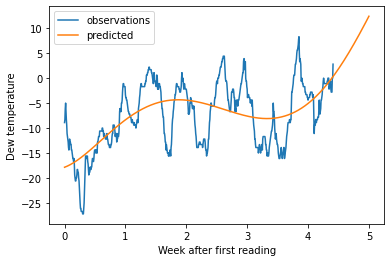

In [24]:

p_10 = packXReal(5)
theta = solveRidgeRegressionSystem(p_10, dewtemp,1)
print('Check number p=10: ', np.sum(theta))

plt.plot(weeks_after_start, dewtemp, label="observations")
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
x = np.linspace(0, 5, 1000)
y = np.zeros(1000)

for i in range(len(x)):
    val = 0
    for j in range(len(theta)):
        v = theta[j] * ((x[i])**j)
        val += v
    y[i] = val
plt.plot(x, y, label="predicted")
plt.legend(loc="upper left")